In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
data.head()


,Glucose,Insulin,BMI,Age,Outcome
0,148,0,33.6,50,1
1,85,0,26.6,31,0
2,183,0,23.3,32,1
3,89,94,28.1,21,0
4,137,168,43.1,33,1


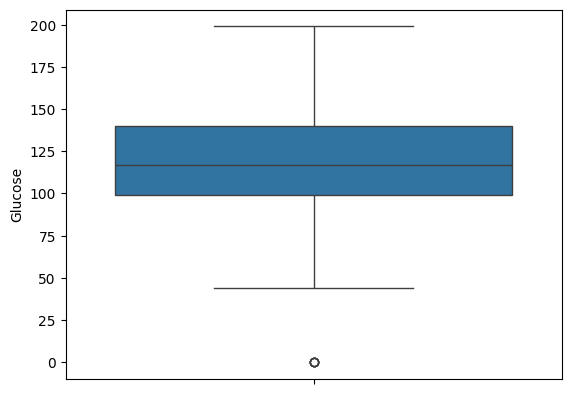

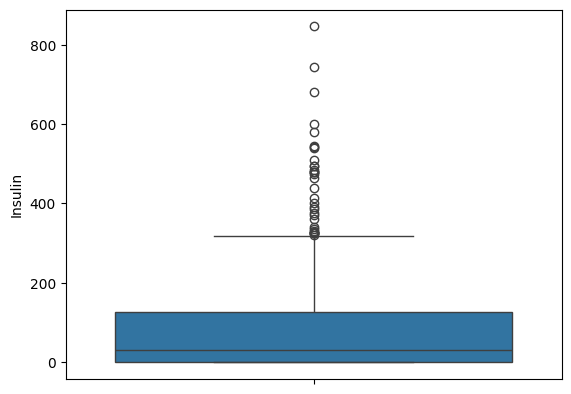

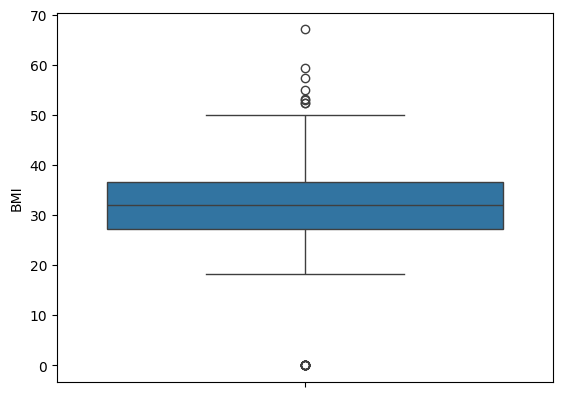

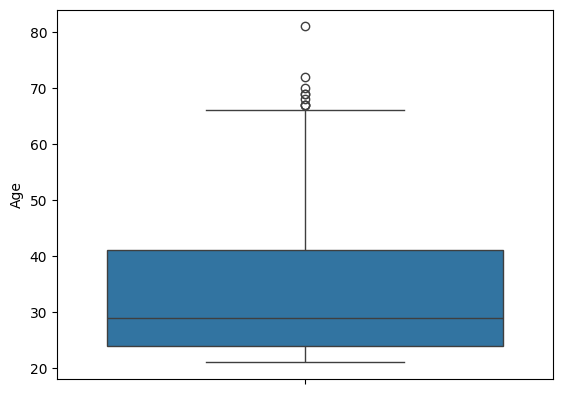

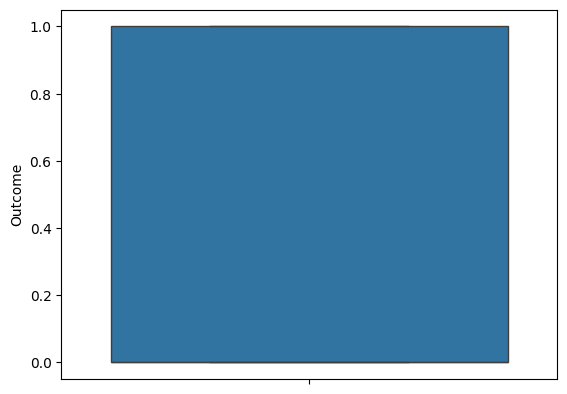

In [ ]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.show()

In [ ]:
for d in data.columns:
  print(d,max(data[d])-min(data[d]))

Glucose 199
Insulin 846
BMI 67.1
Age 60
Outcome 1


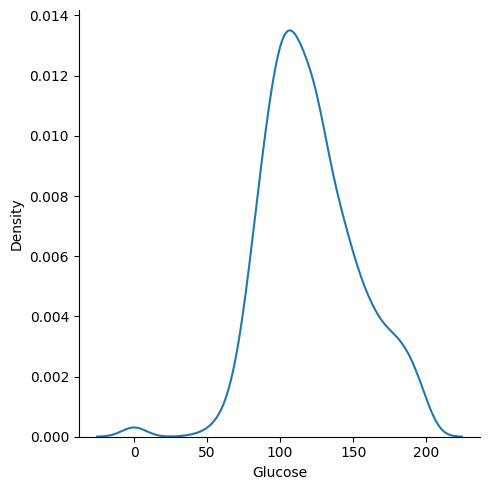

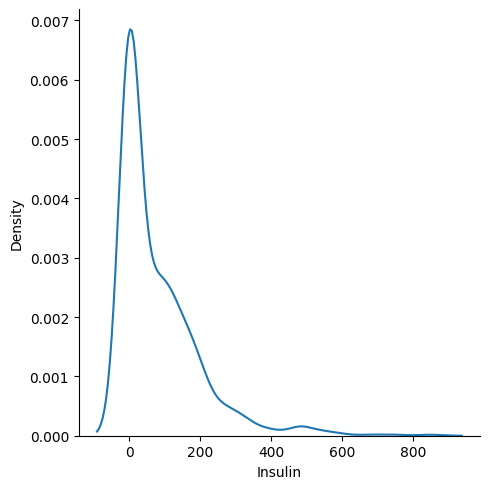

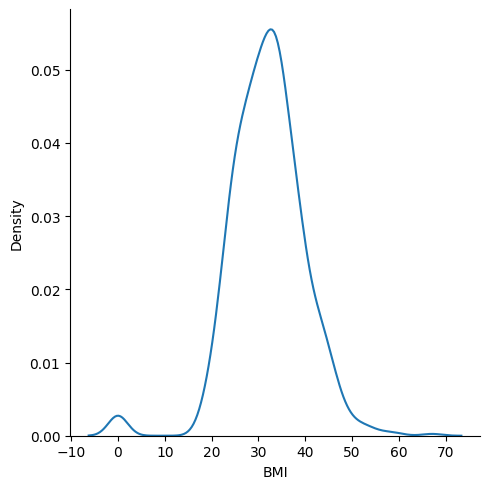

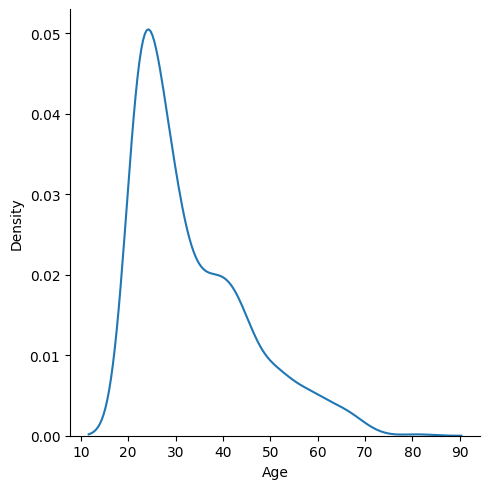

In [ ]:
for d in data.columns:
    if d!="Outcome":
        sns.displot(data=data,x=data[d], kind="kde")
        plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average="macro", zero_division=np.nan)
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")
    return accuracy, precision,recall,f1


In [ ]:
from sklearn.model_selection import train_test_split
X= data.drop('Outcome', axis=1)
y= data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
a,p,r,f=evaluate_model(y_test, y_pred)
print("Evaluations for Naive Bayes")
print(f"Accuracy =",a)
print(f"Precision =",p)
print(f"Recall =",r)
print(f"F1 Score =",f)

Evaluations for Naive Bayes
Accuracy = 0.7467532467532467
Precision = 0.7240740740740741
Recall = 0.7222222222222222
F1 Score = 0.723110967682449


In [ ]:
from sklearn.linear_model import Perceptron
percep=Perceptron(max_iter=1000, tol=0.001, random_state=42)
percep.fit(X_train, y_train)
y_pred = percep.predict(X_test)
print(X_test)
print(y_pred)
a,p,r,f=evaluate_model(y_test, y_pred)
print("Evaluations for Perceptron")
print(f"Accuracy =",a)
print(f"Precision =",p)
print(f"Recall =",r)
print(f"F1 Score =",f)

     Glucose  Insulin   BMI  Age
668       98      190  34.0   43
324      112        0  35.7   21
624      108        0  30.8   21
690      107        0  24.6   34
473      136        0  29.9   50
..       ...      ...   ...  ...
355      165        0  30.4   49
534       77       56  33.3   24
344       95        0  36.8   57
296      146      360  28.0   29
462       74       49  35.3   39

[154 rows x 4 columns]
[0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0]
Evaluations for Perceptron
Accuracy = 0.5844155844155844
Precision = 0.5339033605090475
Recall = 0.5313131313131313
F1 Score = 0.5309347039786789


In [ ]:
import numpy as np

class Perceptron_cust:
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def weighted_sum(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

    def predict(self, X):
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

    def fit(self, X, y):
        # Convert X and y to numeric types if they aren't already
        X = np.array(X)
        y = np.array(y)

        # Initializing the weights to zero
        self.w = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # print("Initial Weights:", self.w)
        y=np.where(y==0,-1,y)
        # Training the model for n_iter iterations
        for _ in range(self.n_iter):
            error = 0
            for xi, target in zip(X, y):
                # Calculate prediction
                y_pred = self.predict(xi)

                # Calculate the update
                update = self.eta * (target - y_pred)

                # Update weights and bias
                self.w[1:] += update * xi
                self.w[0] += update

                # Count errors
                error += int(update != 0.0)

            self.errors_.append(error)

        return self


In [ ]:
perceptron_custom = Perceptron_cust()

In [ ]:
perceptron_custom.fit(X_train, y_train)
Y_pred=perceptron_custom.predict(X_test)
Y_pred=np.where(Y_pred==-1,0,Y_pred)
print("Final Weights:", perceptron_custom.w)
a,p,r,f=evaluate_model(y_test, Y_pred)
print("Evaluations for  Custom Perceptron")
print(f"Accuracy =",a)
print(f"Precision =",p)
print(f"Recall =",r)
print(f"F1 Score =",f)

Final Weights: [-5.26   1.96   4.4   -9.178 -2.02 ]
Evaluations for  Custom Perceptron
Accuracy = 0.49019607843137253
Precision = 0.4894053315105946
Recall = 0.4887477313974592
F1 Score = 0.48221103783408537


In [ ]:
import pickle

pickle.dump(perceptron_custom, open('percep.pkl', 'wb'))
pickle.dump(gnb, open('gnb.pkl', 'wb'))

In [ ]:
with open('percep.pkl', 'rb') as fi:
    loaded_perceptron_model = pickle.load(fi)

loaded_perceptron_model.fit(X_train, y_train)
Y_pred=loaded_perceptron_model.predict(X_test)
Y_pred=np.where(Y_pred==-1,0,Y_pred)
print("Final Weights:", perceptron_custom.w)
a,p,r,f=evaluate_model(y_test, Y_pred)
print("Evaluations for  Custom Perceptron")
print(f"Accuracy =",a)
print(f"Precision =",p)
print(f"Recall =",r)
print(f"F1 Score =",f)

Final Weights: [-5.26   1.96   4.4   -9.178 -2.02 ]
Evaluations for  Custom Perceptron
Accuracy = 0.49019607843137253
Precision = 0.4894053315105946
Recall = 0.4887477313974592
F1 Score = 0.48221103783408537


In [ ]:
from sklearn.model_selection import KFold
X= data.drop('Outcome', axis=1)
y= data['Outcome']
kf= KFold(n_splits=10, shuffle=True, random_state=42)
X=np.array(X)
y=np.array(y)
accuracy_list=[]
precision_list=[]
recall_list=[]
f1_list=[]
accuracy_list_custom=[]
precision_list_custom=[]
recall_list_custom=[]
f1_list_custom=[]
for i, (train_index, test_index) in enumerate(kf.split(X)):
    # print(f"Fold {i}:")
    # print(f"  Train: index={train_index}")
    X_train=X[train_index]
    y_train=y[train_index]
    # print(f"  Test:  index={test_index}")
    X_test=X[test_index]
    y_test=y[test_index]
    perceptron_custom.fit(X_train, y_train)
    Y_pred=perceptron_custom.predict(X_test)
    Y_pred=np.where(Y_pred==-1,0,Y_pred)
    a,p,r,f=evaluate_model(y_test, Y_pred)
    accuracy_list_custom.append(a)
    precision_list_custom.append(p)
    recall_list_custom.append(r)
    f1_list_custom.append(f)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    a,p,r,f=evaluate_model(y_test, y_pred)
    accuracy_list.append(a)
    precision_list.append(p)
    recall_list.append(r)
    f1_list.append(f)

print("Evaluations for Custom Percep K fold")
print(f"Accuracy =",np.mean(accuracy_list_custom))
print(f"Precision =",np.mean(precision_list_custom))
print(f"Recall =",np.mean(recall_list_custom))
print(f"F1 Score =",np.mean(f1_list_custom))

print("\nEvaluations for Gnb K fold")
print(f"Accuracy =",np.mean(accuracy_list))
print(f"Precision =",np.mean(precision_list))
print(f"Recall =",np.mean(recall_list))
print(f"F1 Score =",np.mean(f1_list))

Evaluations for Custom Percep K fold
Accuracy = 0.5753588516746412
Precision = 0.5500767210070971
Recall = 0.520189151390825
F1 Score = 0.4748853788478809

Evaluations for Gnb K fold
Accuracy = 0.7525290498974709
Precision = 0.7343339384774703
Recall = 0.7028186386963975
F1 Score = 0.7067436162353921
